# Parsing the XML Data

In [83]:
import xml.etree.ElementTree as ET
import numpy as np
import random
import matplotlib.pyplot as plt
import time
# Parse the XML file
tree = ET.parse(r'C:\Users\Anish\Downloads\burma14.xml')
root = tree.getroot()
# Find the graph element
graph = root.find('graph')
# Initialize variables
num_vertices = int(root.find('description').text.split('-')[0])
cost_matrix = np.zeros((num_vertices, num_vertices))
# Initialize vertex_id
vertex_id = 0
# Iterate through the edge elements and populate the cost matrix
for vertex in graph.findall('vertex'):
    for edge in vertex.findall('edge'):
        target_vertex = int(edge.text)
        cost = float(edge.attrib['cost'])
        cost_matrix[vertex_id , target_vertex ] = cost
    # Increment vertex_id
    vertex_id += 1
# Print the cost matrix
print(cost_matrix)
num_cities = num_vertices

[[   0.  153.  510.  706.  966.  581.  455.   70.  160.  372.  157.  567.
   342.  398.]
 [ 153.    0.  422.  664.  997.  598.  507.  197.  311.  479.  310.  581.
   417.  376.]
 [ 510.  422.    0.  289.  744.  390.  437.  491.  645.  880.  618.  374.
   455.  211.]
 [ 706.  664.  289.    0.  491.  265.  410.  664.  804. 1070.  768.  259.
   499.  310.]
 [ 966.  997.  744.  491.    0.  400.  514.  902.  990. 1261.  947.  418.
   635.  636.]
 [ 581.  598.  390.  265.  400.    0.  168.  522.  634.  910.  593.   19.
   284.  239.]
 [ 455.  507.  437.  410.  514.  168.    0.  389.  482.  757.  439.  163.
   124.  232.]
 [  70.  197.  491.  664.  902.  522.  389.    0.  154.  406.  133.  508.
   273.  355.]
 [ 160.  311.  645.  804.  990.  634.  482.  154.    0.  276.   43.  623.
   358.  498.]
 [ 372.  479.  880. 1070. 1261.  910.  757.  406.  276.    0.  318.  898.
   633.  761.]
 [ 157.  310.  618.  768.  947.  593.  439.  133.   43.  318.    0.  582.
   315.  464.]
 [ 567.  581.  374.  

# Cost matrix 'edge_costs' represent the costs between cities.
# Genetic Algorithm Parameters

In [84]:
population_size = 100
tournament_size = 10  # Size of the tournament for selection
mutation_rate = 0.1  # Probability of mutation
starttime=time.time() #Check the execution time

# Initialize the population


In [85]:
population = []
for _ in range(population_size):
    tour = random.sample(range(1, num_cities + 1), num_cities) # Initialize a random tour by sampling cities without replacement
    population.append(tour)

# Defining functions to calculate the cost, fitness, tournament selection, crossovers, mutations, replacement

In [86]:
def calculate_total_cost(tour): # Function to calculate the total cost of the tour.
    return sum(cost_matrix[tour[i - 1] - 1][tour[i] - 1] for i in range(num_cities))

def fitness(individual): # Function to calculate the fitness with the formula provided.
    cost = 0
    for i in range(len(individual) - 1):
        cost += cost_matrix[individual[i] - 1][individual[i + 1] - 1]
    cost += cost_matrix[individual[-1] - 1][individual[0] - 1]
    return 1 / cost

# Tournament Selection: Select individuals for the tournament using random sampling from the population
def tournament_selection(population, tournament_size):
    selected = random.sample(population, tournament_size)
    return max(selected, key=fitness)


# Single-Point Crossover
def single_point_crossover(parent1, parent2):
    # Randomly select a crossover point between the first and second-to-last positions
    point = random.randint(1, num_cities - 1)
    child1 = parent1[:point] + [city for city in parent2 if city not in parent1[:point]]
    child2 = parent2[:point] + [city for city in parent1 if city not in parent2[:point]]
    return child1, child2

#Multiple swap mutation
def multiple_swap_mutation(individual, num_swaps=3):
    for _ in range(num_swaps):
        # Randomly select two distinct indices from the range of city positions
        idx1, idx2 = random.sample(range(num_cities), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

#Inversion Mutation Operator
def inversion_mutation(individual):
    mutated_individual = individual.copy()
    # Randomly select two distinct points
    point1, point2 = random.sample(range(len(individual)), 2)
    start, end = min(point1, point2), max(point1, point2)
    # Invert the subsequence between the two points
    mutated_individual[start:end + 1] = reversed(mutated_individual[start:end + 1])
    return mutated_individual

# Mutation
def mutate(tour):
    if random.random() < mutation_rate:
        # Swap two random cities in the tour
        idx1, idx2 = random.sample(range(num_cities), 2)
        tour[idx1], tour[idx2] = tour[idx2], tour[idx1]
    return tour

# Replacement
def replace_worst(population, new_tour):
    # Sort the population based on the calculated total cost of each individual
    population.sort(key=calculate_total_cost)
    population[-1] = new_tour
    return population

# Genetic Algorithm Loop

In [87]:
best_fitness = 0
y_points = []
x_points = []
avg=[]
# Genetic Algorithm Loop
generations = 10000  
for generation in range(generations):
    a = tournament_selection(population, tournament_size)
    b = tournament_selection(population, tournament_size)
    c, d = single_point_crossover(a, b)
    e = multiple_swap_mutation(c)
    f = multiple_swap_mutation(d)
   
    # Evaluate the fitness of e and f
    e_cost = fitness(e)
    f_cost = fitness(f)
    
    # Update the best fitness if needed
    if e_cost > best_fitness:
        best_fitness = e_cost
    if f_cost > best_fitness:
        best_fitness = f_cost
    y_points.append(best_fitness)
    # Run the replacement function
    if e_cost < f_cost:
        population = replace_worst(population, e)
    else:
        population = replace_worst(population, f)  
    t=0
    c=0
    for randompop in population:
        t+=fitness(randompop)
        c+=1
    avg.append(t/c)
    x_points.append(generation)
    
endtime = time.time()

# The final population contains the best tour found after the specified number of generations.

Best Tour: [7, 5, 14, 13, 12, 6, 4, 3, 2, 10, 11, 1, 8, 9]
Best Tour Cost: 4327.0
Best Fitness: 0.00026624068157614486
Execution time is 11.352836847305298


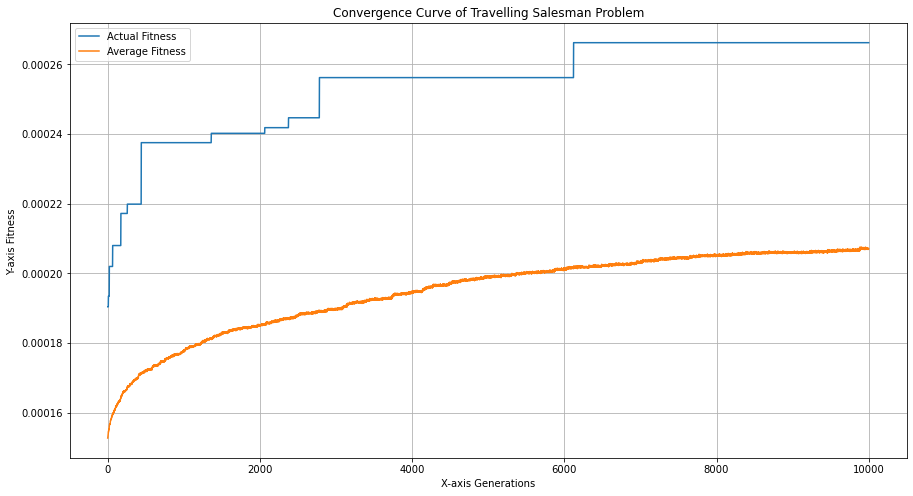

In [88]:
best_tour = min(population, key=calculate_total_cost)
best_cost = calculate_total_cost(best_tour)
print("Best Tour:", best_tour)
print("Best Tour Cost:", best_cost)
print("Best Fitness:", best_fitness)
print(f"Execution time is {endtime - starttime}")
plt.figure(figsize=(15, 8))
plt.plot(x_points, y_points, linestyle='-',label='Actual Fitness')
plt.plot(x_points, avg, linestyle='-',label='Average Fitness')
plt.title("Convergence Curve of Travelling Salesman Problem")
plt.xlabel("X-axis Generations")
plt.ylabel("Y-axis Fitness ")
plt.legend()
plt.grid(True)
plt.show()